#P-1

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [2]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [24]:
def preprocess(file_path):

  with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()
  print(f"Original Text: {text}")

  text = text.lower()
  print(f"Lowered text: {text}")

  text = text.translate(str.maketrans('','',string.punctuation))
  print(f"punctuation removed: {text}")

  words = nltk.word_tokenize(text)
  print(f"tokenized text: {text}")

  processed_words = []
  for word in words:
    if word not in stop_words:
      stemmed_word = ps.stem(word)
      processed_words.append(stemmed_word)
  print(f"stemmed words: {processed_words}")



In [25]:
file_path = "/content/file.txt"
preprocess(file_path)

Original Text: Sachin Ramesh Tendulkar (/ˌsʌtʃɪn tɛnˈduːlkər/ ⓘ; pronounced [sətɕin teːɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. He is widely regarded as one of the greatest batsmen in the history of cricket.[5] Hailed as the world's most prolific batsman of all time, he is the all-time highest run-scorer in both ODI and Test cricket with more than 18,000 runs and 15,000 runs, respectively.[6] He also holds the record for receiving the most player of the match awards in international cricket.[7] Tendulkar was a Member of Parliament, Rajya Sabha by presidential nomination from 2012 to 2018.[
Lowered text: sachin ramesh tendulkar (/ˌsʌtʃɪn tɛnˈduːlkər/ ⓘ; pronounced [sətɕin teːɳɖulkəɾ]; born 24 april 1973) is an indian former international cricketer who captained the indian national team. he is widely regarded as one of the greatest batsmen in the history of cricket.[5] hailed as the world's most prolific batsman of 

#P-2

In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('/content/drive/MyDrive/Practical_Datasets/IR/heart.csv')
heartDisease = heartDisease.replace("?",np.nan)

model = BayesianNetwork([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),
                       ('fbs','heartdisease'),('heartdisease','restecg'), ('heartdisease','thalach'),('heartdisease','chol')])

model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

model_infer = VariableElimination(model)

q = model_infer.query(variables=["heartdisease"], evidence={"age":38})
print(q)

q = model_infer.query(variables=["heartdisease"], evidence={"chol":240})
print(q)

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.7026 |
+-----------------+---------------------+
| heartdisease(1) |              0.1024 |
+-----------------+---------------------+
| heartdisease(2) |              0.0577 |
+-----------------+---------------------+
| heartdisease(3) |              0.0631 |
+-----------------+---------------------+
| heartdisease(4) |              0.0741 |
+-----------------+---------------------+
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              1.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.0000 |
+-----------------+---------------------+
| heartdisease(3) |              0.0000 |
+-----------------+---------------

#P-3

<ipython-input-1-282b1551f0f9>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)


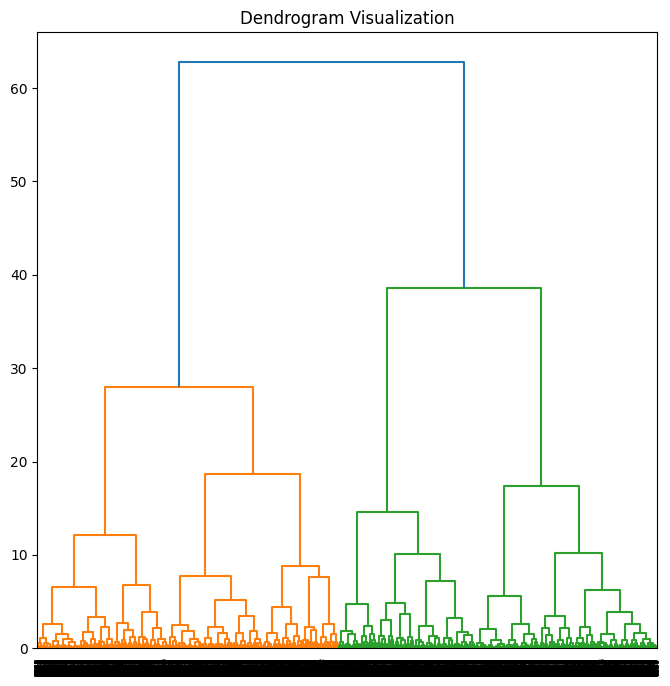

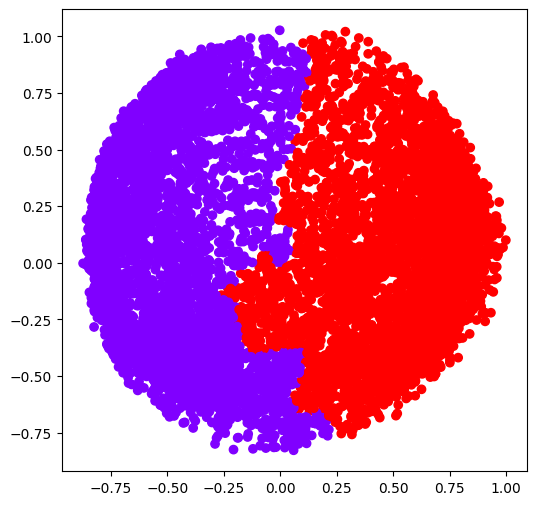

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

X = pd.read_csv('/content/drive/MyDrive/Practical_Datasets/IR/CC GENERAL.csv')

X = X.drop("CUST_ID", axis=True)

X.fillna(method="ffill", inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_Dataframe = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1","P2"]

plt.figure(figsize=(8,8))
plt.title("Dendrogram Visualization")
shc.dendrogram(shc.linkage(X_principal, method="ward"))
plt.show()

ac2 = AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(6,6))
plt.scatter(X_principal["P1"], X_principal["P2"],c = ac2.fit_predict(X_principal), cmap="rainbow")
plt.show()

#P-4

In [89]:
import numpy as np

adj_matrix = np.array([
    [0,1,0,1],
    [1,0,0,0],
    [0,0,1,0],
    [1,0,0,1]
])

d = 0.85
n = adj_matrix.shape[0]
page_rank = np.ones(n) / n

out_degree = adj_matrix.sum(axis=1)

for i in range(n):
  for j in range(n):
    if out_degree[i] != 0:
      adj_matrix[i][j] = adj_matrix[i][j] / out_degree[i]
    else:
      adj_matrix[i][j] = i / n

iterations = 100
for _ in range(iterations):
    # Update PageRank values
    new_rank = (1 - d) / n + d * adj_matrix.T @ page_rank
    page_rank = new_rank

print("PageRank Results:")
for i, rank in enumerate(page_rank):
    print(f"Page {chr(65 + i)}: {rank:.4f}")

#P-5

In [7]:
!pip install requests beautifulsoup4

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

url = 'https://books.toscrape.com/'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

books = []
for item in soup.find_all('article', class_='product_pod'):
    # Get book title
    title = item.find('h3').text.strip()

    # Get book link
    link = item.find('a')['href']
    link = 'https://books.toscrape.com/' + link  # Add base URL to complete the link

    # Get book price
    price = item.find('p', class_='price_color').text.strip()

    # Append the extracted data into the books list
    books.append({
        'Book_Title': title,
        'Price': price,
        'Book_Link': link
    })

# Step 4: Create a DataFrame from the extracted data
df = pd.DataFrame(books)

# Step 5: Print the DataFrame to check the output
print(df.head())

# Step 6: Save the DataFrame to a CSV file
df.to_csv('books.csv', index=False, encoding='utf-8')
print(f'{len(books)} books extracted and saved to books.csv.')

file = pd.read_csv('books.csv')

file.head()

                     Book_Title    Price  \
0            A Light in the ...  Â£51.77   
1            Tipping the Velvet  Â£53.74   
2                    Soumission  Â£50.10   
3                 Sharp Objects  Â£47.82   
4  Sapiens: A Brief History ...  Â£54.23   

                                           Book_Link  
0  https://books.toscrape.com/catalogue/a-light-i...  
1  https://books.toscrape.com/catalogue/tipping-t...  
2  https://books.toscrape.com/catalogue/soumissio...  
3  https://books.toscrape.com/catalogue/sharp-obj...  
4  https://books.toscrape.com/catalogue/sapiens-a...  
20 books extracted and saved to books.csv.


,Book_Title,Price,Book_Link
0,A Light in the ...,Â£51.77,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,Â£53.74,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,Â£50.10,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,Â£47.82,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History ...,Â£54.23,https://books.toscrape.com/catalogue/sapiens-a...


#Bio Practicals
#P-1

In [1]:
import re
sequence = ""
with open("sequence.fasta") as f:
 lines = f.readlines()
 sequence = ''.join(line.strip() for line in lines[1:]).upper()
g_count = sequence.count('G')
c_count = sequence.count('C')
total_count = len(sequence)
gc_percent = ((g_count + c_count) / total_count) * 100
print(f"G Count: {g_count}")
print(f"C Count: {c_count}")
print(f"Total Count: {total_count}")
print(f"GC Percent: {gc_percent:.2f}%")

a_count = sequence.count('A')
t_count = sequence.count('T')
at_percent = ((a_count + t_count) / total_count) * 100
print(f"A Count: {a_count}")
print(f"T Count: {t_count}")
print(f"AT Percent: {at_percent:.2f}%")

ratio = (a_count + t_count) / (g_count + c_count)
print(f"AT/GC Ratio: {ratio:.2f}")
start_codon = 'ATG'
stop_codons = ['TAA', 'TAG', 'TGA']
coding_regions = []
start_index = sequence.find(start_codon)
print(start_index)

while start_index != -1:
  for stop_codon in stop_codons:
    stop_index = sequence.find(stop_codon, start_index + 3)
    if stop_index != -1 and (stop_index - start_index) % 3 == 0:
      coding_region = sequence[start_index:stop_index + 3]
      coding_regions.append(coding_region)
      break
  start_index = sequence.find(start_codon, start_index + 1)
if coding_regions:
  print("Coding Regions Found")
  for i, coding_region in enumerate(coding_regions, start=1):
    print(f"\nRegion {i}: {coding_region}\nLength: {len(coding_region)}")
else:
  print("No coding regions found")

def find_motifs(sequence, motif):
  print(f"\nSearching for motif: {motif}")
  matches = [match.start() for match in re.finditer(motif, sequence)]
  if matches:
    print(f"Motif '{motif}' found at positions: {matches}")
  else:
    print(f"Motif '{motif}' not found")

motif = "TATAA"
find_motifs(sequence, motif)

FileNotFoundError: [Errno 2] No such file or directory: 'sequence.fasta'

#P-3

In [ ]:
if(!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("DESeq2")
BiocManager::install("pasilla")
BiocManager::install("ggplot2")
BiocManager::install("ggrepel")

library("DESeq2")
library("pasilla")
library("ggplot2")
library("ggrepel")

count_csv <- system.file("extdata",
                         "pasilla_gene_counts.tsv",
                         package = "pasilla", mustWork = TRUE)

annotation_csv <- system.file("extdata",
                              "pasilla_sample_annotation.csv",
                              package = "pasilla", mustWork = TRUE)

count_data <- read.csv(count_csv, sep = "\t", row.names = "gene_id")
count_matrix <- as.matrix(count_data)

annotation_data <- read.csv(annotation_csv, row.names = 1)
annotation_data$condition <- factor(annotation_data$condition)

rownames(annotation_data) <- sub("fb", "", rownames(annotation_data))

all(rownames(annotation_data) %in% colnames(count_matrix))

all(rownames(annotation_data) == colnames(count_matrix))

count_matrix <- count_matrix[, rownames(annotation_data)]

all(rownames(annotation_data) == colnames(count_matrix))

deseq <- DESeqDataSetFromMatrix(countData = count_matrix,
                                colData = annotation_data,
                                design = ~ condition)

diff_exp_analysis <- DESeq(deseq)

diff_exp_result <- results(diff_exp_analysis)

write.csv("./DESeq_Analysis.csv", header = TRUE)

dataframe <- read.csv("./DESeq_Analysis.csv", header = TRUE)

dataframe$expressed <- "NO"

dataframe$expressed[dataframe$log2FoldChange > 0.1 & dataframe$pvalue < 0.05] <- "UP"
dataframe$expressed[dataframe$log2FoldChange < -0.1 & dataframe$pvalue < 0.05] <- "DOWN"

upregulated_genes <- rownames(dataframe[dataframe$expressed == "UP", ])
downregulated_genes <- rownames(dataframe[dataframe$expressed == "DOWN", ])

write(upregulated_genes, file = "upregualated_genes.txt")
write(downregulated_genes, file = "downregulated_genes.txt")

ggplot(data = dataframe, aes(x = log2FoldChange, y = -log10(pvalue), col = expressed)) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") +
  geom_point(size = 2) +
  theme_minimal() +
  scale_color_manual(values = c("turquoise", "grey", "pink"),
                     labels = c("Downregulated", "Not Significant", "Upregulated")) +
  labs(x = "log2 Fold Change", y = "-log10 P-value", color = "Expression")


#P-4

In [ ]:
!pip install category_encoders

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics
import category_encoders
import imblearn

df=pd.read_csv("METABRIC_RNA_Mutation.csv")

df.shape

df1=df.dropna()

total = df.isnull().sum().sort_values(ascending=False)

df.info()

df_expression = df.iloc[:, 31:519].join(df['overall_survival'],how='inner')
df_expression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Function to evaluate and display results for RandomForest model
def evaluate_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Predictions and probabilities
    y_pred = model.predict(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Display classification metrics
    print("\n=== RandomForest Classifier ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title('Confusion Matrix - RandomForest')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Main function to process the dataset and evaluate the RandomForest model
def main(df, target_column):
    # Prepare the dataset
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train and evaluate RandomForest model
    evaluate_random_forest(X_train, X_test, y_train, y_test)

# Load your dataset and specify the target column
if __name__ == "__main__":
    # Replace with your dataframe
    df = df_expression  # Example input dataframe
    target_column = 'overall_survival'  # Replace with the actual target column name
    main(df, target_column)